# 1、softmax回归

![](picture//softmax.jpg)

## 读取数据集
    MNIST数据集 [LeCun et al., 1998] 是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。 我们将使用类似但更复杂的Fashion-MNIST数据集 [Xiao et al., 2017]。

In [1]:
import matplotlib_inline 
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
import matplotlib.pyplot as plt


我们可以通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中。

In [2]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
#下载训练数据
mnist_train = torchvision.datasets.FashionMNIST(
    root="datasets",  #保存的目录
    train=True,       #下载的是训练数据集
    transform=trans,   #得到的是pytorch的tensor，而不是图片
    download=True)  #从网上下载
#下载测试数据
mnist_test = torchvision.datasets.FashionMNIST(
    root="datasets", train=False, transform=trans, download=True)
len(mnist_train),len(mnist_test)

(60000, 10000)

In [3]:
# 查看图片大小
mnist_train[0][0].shape

torch.Size([1, 28, 28])

## 可视化数据集

Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。 以下函数用于在数字标签索引及其文本名称之间进行转换。

In [4]:
def get_labels(labels):  
    '''返回数据集的文本标签'''
    text_labels=['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def use_svg_display():
    '''用矢量图显示'''
    matplotlib_inline.backend_inline.set_matplotlib_formats('svg')  #这样设置分辨率高

In [5]:
def show_image(images,labels):
    use_svg_display()  #
    '''绘制图表'''
    plt.rcParams['figure.figsize'] =(3.5,2.5)  #设置图片的大小
    _,figs=plt.subplots(1, len(images),figsize=(10,10))
    for f,img,label in zip(figs,images,labels):
        f.imshow(img.view((28,28)).numpy())  #显示图片
        f.set_title(label)  #显示标题
        f.axes.get_xaxis().set_visible(False)  #是否显示x轴
        f.axes.get_yaxis().set_visible(False)
    plt.show()

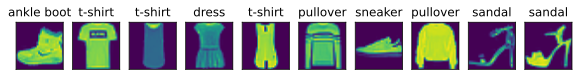

In [6]:
x,y=[],[]
for i in range(10):
    x.append(mnist_train[i][0])  #获取数据
    y.append(mnist_train[i][1])  #获取标签
show_image(x,get_labels(y))

## 读取小批量数据

为了使我们在读取训练集和测试集时更容易，我们使用内置的数据迭代器，而不是从零开始创建。 回顾一下，在每次迭代中，数据加载器每次都会读取一小批量数据，大小为batch_size。 通过内置数据迭代器，我们可以随机打乱了所有样本，从而无偏见地读取小批量。

In [7]:
batch_size=256
def get_dataloader_wokers():
    '''使用4个进程来读取数据'''
    return 4
train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,
                            num_workers=get_dataloader_wokers())

In [8]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'4.02 sec'

## 整合所有组件

In [9]:
def load_data_fashion_mnist(batch_size,resize=None):
    '''下载数据'''
    trans=[transforms.ToTensor()]
    #修改图片大小
    if resize:
        trans.insert(0,transforms.Resize(resize)) 
    trans=transforms.Compose(trans)
    #下载训练数据
    mnist_train = torchvision.datasets.FashionMNIST(
    root="datasets",  #保存的目录
    train=True,    #下载的是训练数据集
    transform=trans,   #得到的是pytorch的tensor，而不是图片
    download=True)  #从网上下载
    #下载测试数据
    mnist_test = torchvision.datasets.FashionMNIST(
        root="datasets", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train,batch_size,shuffle=True,
                            num_workers=get_dataloader_wokers()),
            data.DataLoader(mnist_test,batch_size,shuffle=False,
                            num_workers=get_dataloader_wokers()))

In [10]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
